Importando as bilbiotecas:

In [1]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

Desenvolvendo o modelo:

In [2]:
model = Sequential([
  Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D((3, 3)),
  Flatten(),
  Dense(10, activation='softmax')
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 16)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


Compilando o modelo:

In [4]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

In [5]:
model.compile(
    optimizer = opt,
    loss = 'sparse_categorical_crossentropy',
    metrics = [acc, mae]
)

In [6]:
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


Importando o dataset:

In [7]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [8]:
# Imprimindo o formato do dataset
train_images.shape

(60000, 28, 28)

In [9]:
# Definindo os rotulos
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [10]:
# Redimensionar os valores da imagem de modo a que fiquem entre 0 e 1.
train_images = train_images / 255.
test_images = test_images / 255.

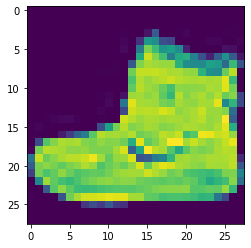

label: Ankle boot


In [11]:
# Exibindo uma imagem
i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

Treinando o modelo:

In [12]:
model.fit(train_images[..., np.newaxis], train_labels, epochs=2, batch_size=256)

Epoch 1/2
235/235 [==============================] - 22s 88ms/step - loss: 0.5834 - sparse_categorical_accuracy: 0.7938 - mean_absolute_error: 4.4200
Epoch 2/2
235/235 [==============================] - 15s 65ms/step - loss: 0.3904 - sparse_categorical_accuracy: 0.8613 - mean_absolute_error: 4.4200


In [13]:
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=8, batch_size=256, verbose=2)

Epoch 1/8
235/235 - 13s - loss: 0.3513 - sparse_categorical_accuracy: 0.8756 - mean_absolute_error: 4.4200 - 13s/epoch - 56ms/step
Epoch 2/8
235/235 - 13s - loss: 0.3327 - sparse_categorical_accuracy: 0.8823 - mean_absolute_error: 4.4200 - 13s/epoch - 56ms/step
Epoch 3/8
235/235 - 13s - loss: 0.3132 - sparse_categorical_accuracy: 0.8882 - mean_absolute_error: 4.4200 - 13s/epoch - 56ms/step
Epoch 4/8
235/235 - 13s - loss: 0.3034 - sparse_categorical_accuracy: 0.8914 - mean_absolute_error: 4.4200 - 13s/epoch - 56ms/step
Epoch 5/8
235/235 - 13s - loss: 0.2950 - sparse_categorical_accuracy: 0.8945 - mean_absolute_error: 4.4200 - 13s/epoch - 56ms/step
Epoch 6/8
235/235 - 13s - loss: 0.2889 - sparse_categorical_accuracy: 0.8963 - mean_absolute_error: 4.4200 - 13s/epoch - 57ms/step
Epoch 7/8
235/235 - 14s - loss: 0.2806 - sparse_categorical_accuracy: 0.8993 - mean_absolute_error: 4.4200 - 14s/epoch - 58ms/step
Epoch 8/8
235/235 - 13s - loss: 0.2744 - sparse_categorical_accuracy: 0.9021 - mean

Plotando o histórico de treinamento:

In [14]:
# Carregando os dados dentro de um dataframe
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.351326,0.875633,4.420001
1,0.332750,0.882283,4.420000
2,0.313206,0.888233,4.420001
3,0.303448,0.891383,4.420001
4,0.295019,0.894450,4.419999


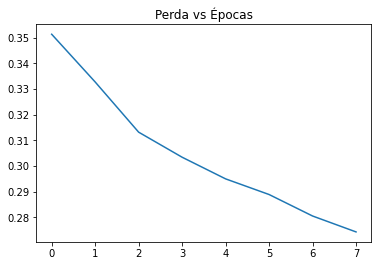

In [15]:
# Plotando a perda
loss_plot = df.plot(y='loss', title='Perda vs Épocas', legend=False)

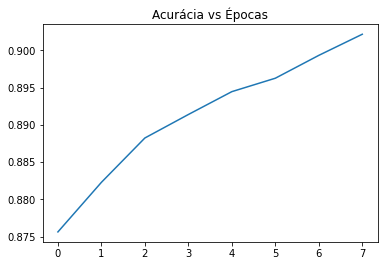

In [16]:
# Plotando a acurácia
loss_plot = df.plot(y='sparse_categorical_accuracy', title='Acurácia vs Épocas', legend=False)

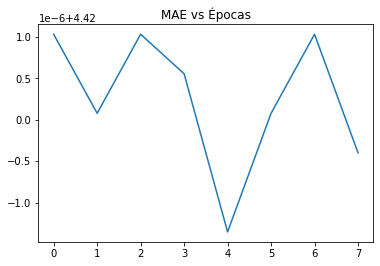

In [17]:
# Plotando o Erro quadrático Absoluto
loss_plot = df.plot(y='mean_absolute_error', title='MAE vs Épocas', legend=False)

Avaliando o desempenho da rede:



In [20]:
test_loss, test_accuracy, test_mae = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3134 - sparse_categorical_accuracy: 0.8872 - mean_absolute_error: 4.4200 - 1s/epoch - 5ms/step


Fazendo predições com o modelo desenvolvido:

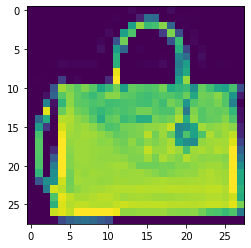

Label: Bag


In [21]:
random_inx = np.random.choice(test_images.shape[0])
inx = 30

test_image = test_images[inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[inx]]}")

In [24]:
predictions = model.predict(test_image[np.newaxis, ..., np.newaxis])
print(f"Model prediction {labels[np.argmax(predictions)]}")

Model prediction Bag
